<a href="https://colab.research.google.com/github/kiranmai613/ProblemsusingDataPreprocessing/blob/main/2_4_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.corr()['SalePrice'].sort_values(ascending = False)

<ipython-input-8-b96943278a62>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice'].sort_values(ascending = False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [9]:
df.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

<Axes: >

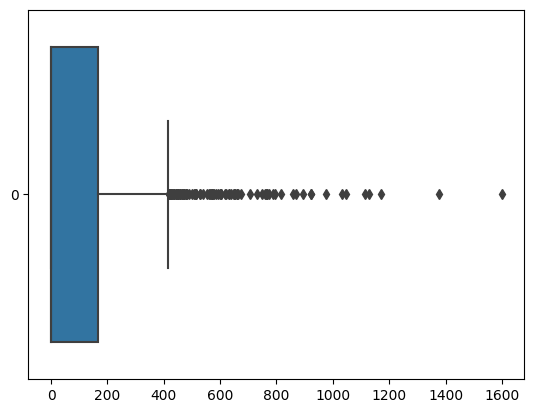

In [10]:
# dealing with null values
df['LotFrontage'].fillna(df['LotFrontage'].mean().astype(int),inplace = True)
df['GarageType'].fillna(df['GarageType'].mode()[0],inplace = True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0],inplace = True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0],inplace = True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0],inplace = True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0],inplace = True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0],inplace = True)
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df['MasVnrArea'],orient = 'h')

In [11]:
df = df[df['LotFrontage']!=313]
df = df[df['MasVnrArea']<800]
# Imbalanced data 
print((df.PavedDrive).value_counts(),'\n')
print((df.GarageCond).value_counts(),'\n')
print((df.GarageQual).value_counts(),'\n')
print((df.Functional).value_counts(),'\n')
print((df.Electrical).value_counts(),'\n')
print((df.CentralAir).value_counts(),'\n')
print((df.Heating).value_counts(),'\n')
print((df.BsmtFinType2).value_counts(),'\n')
print((df.BsmtCond).value_counts(),'\n')
print((df.ExterCond).value_counts(),'\n')
print((df.LandContour).value_counts(),'\n')
print((df.Street).value_counts(),'\n')
print((df.MSZoning).value_counts(),'\n')
print((df.LandContour).value_counts(),'\n')
print((df.LandSlope).value_counts(),'\n')
print((df.Condition1).value_counts(),'\n')
print((df.Condition2).value_counts(),'\n')
print((df.BldgType).value_counts(),'\n')
print((df.RoofStyle).value_counts(),'\n')
print((df.RoofMatl).value_counts(),'\n')
print((df.SaleType).value_counts(),'\n')
print((df.SaleCondition).value_counts(),'\n')

Y    1316
N      90
P      30
Name: PavedDrive, dtype: int64 

TA    1302
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64 

TA    1287
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64 

Typ     1337
Min2      34
Min1      31
Mod       15
Maj1      13
Maj2       5
Sev        1
Name: Functional, dtype: int64 

SBrkr    1310
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64 

Y    1341
N      95
Name: CentralAir, dtype: int64 

GasA     1404
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64 

Unf    1233
Rec      54
LwQ      46
BLQ      32
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 

TA    1288
Gd      64
Fa      45
Po       2
Name: BsmtCond, dtype: int64 

TA    1260
Gd     144
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64 

Lvl    1290
Bnk      62
HLS      48
Low      36
Name: LandContour, dtype: int64 

Pave    1430
Grv

In [12]:
df.drop(['Id','Alley','PoolQC','BedroomAbvGr','ScreenPorch','OverallCond','Fence','MiscVal','3SsnPorch','PoolArea','LowQualFinSF','BsmtHalfBath','MiscFeature','FireplaceQu','MoSold','YrSold','EnclosedPorch','Utilities','GarageArea','MSSubClass','KitchenAbvGr','BsmtFinSF2','SaleType','SaleCondition','PavedDrive','GarageCond','GarageQual','Functional','Electrical','CentralAir','Heating','BsmtFinType2','BsmtCond','ExterCond','LandContour','Street','MSZoning','LandContour','LandSlope','Condition1','Condition2','BldgType','RoofStyle','RoofMatl'],axis = 1,inplace = True)
from sklearn.preprocessing import LabelEncoder
cols = ['LotConfig','LotShape', 'Neighborhood','HouseStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','GarageType','GarageFinish']
le = LabelEncoder()
for i in cols:
    df[i] = le.fit_transform(df[i])
df = df.convert_dtypes()
(df['LotArea']>100000).sum()

4

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LotConfig'}>,
        <Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'HouseStyle'}>],
       [<Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'Exterior1st'}>,
        <Axes: title={'center': 'Exterior2nd'}>,
        <Axes: title={'center': 'MasVnrType'}>],
       [<Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'ExterQual'}>,
        <Axes: title={'center': 'Foundation'}>,
        <Axes: title={'center': 'BsmtQual'}>,
        <Axes: title={'center': 'BsmtExposure'}>,
        <Axes: title={'center': 'BsmtFinType1'}>],
       [<Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'Tot

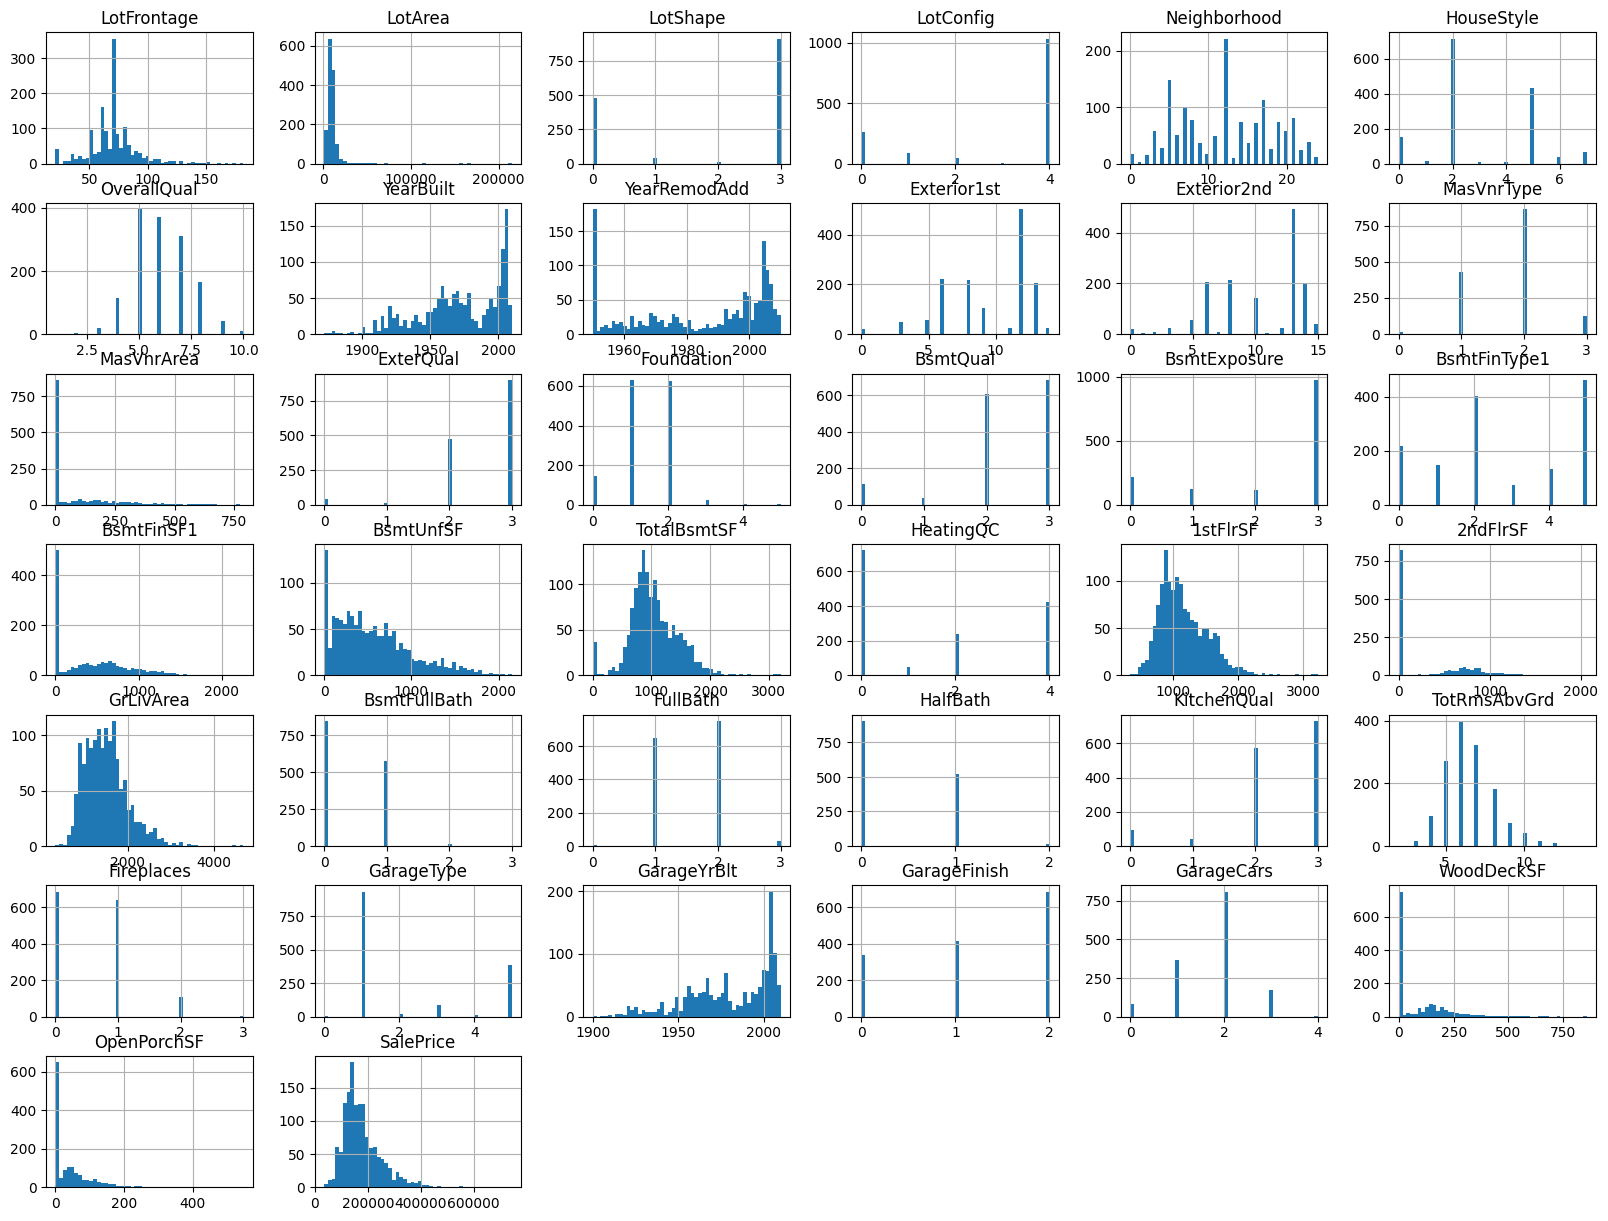

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins = 50, figsize= (20,15))

In [14]:
df.reset_index(inplace = True,drop = True)
x,y = df.drop(['SalePrice'],axis = 1),df['SalePrice']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,'\n',x_test.shape,'\n',y_train.shape,'\n',y_test.shape)

(1148, 37) 
 (288, 37) 
 (1148,) 
 (288,)


In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

def find_best_model(x, y):
    ml = {
        'KNeighbors_Regressor': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance'],
                'p': [1, 2]
            }
        },
        'Linear_Regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        }
    }
    scores = []
    for ml_name, mp in ml.items():
        gs = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='neg_mean_squared_error')
        gs.fit(x, y)
        scores.append({
            'model': ml_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(x, y)

,model,best_score,best_params
0,KNeighbors_Regressor,-1.686960e+09,"{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}"
1,Linear_Regression,-9.184054e+08,{'fit_intercept': True}


In [17]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8554646237507285
684759383.6137202
